In [1]:
import torch
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.,5.)

In [ ]:
x= torch.rand([2000,4000])
x.shape

torch.Size([2000, 4000])

In [ ]:
torch.device('cuda:0')

device(type='cuda', index=0)

In [ ]:
# для перемещения вычислений на GPU 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
# проверяем где лежит
device

device(type='cuda', index=0)

In [ ]:
# перемещаем тензор на GPU
x_cuda = x.to(device) 


In [ ]:
# задаём вычисления для тензора Х на CPU
%time y = x**2 *x - x *10


CPU times: user 23.7 ms, sys: 49.6 ms, total: 73.3 ms
Wall time: 82.3 ms


In [ ]:
# задаём вычисления для тензора Х на GPU
%time y_cuda = x_cuda**2 *x_cuda - x_cuda *10


CPU times: user 961 µs, sys: 982 µs, total: 1.94 ms
Wall time: 1.79 ms


In [ ]:
x = torch.tensor(
   [[2.,4.,6.,8.],
    [1.,3.,5.,7.],
    [4.,5.,8.,9.]], requires_grad=True # включаем историю requires_grad=True
)
x


tensor([[2., 4., 6., 8.],
        [1., 3., 5., 7.],
        [4., 5., 8., 9.]], requires_grad=True)

In [ ]:
# Просмотрим историю вычислений 
func = 15* (x**3).sum()  

func.backward()
print (x.grad, '<-- gradient')


tensor([[ 180.,  720., 1620., 2880.],
        [  45.,  405., 1125., 2205.],
        [ 720., 1125., 2880., 3645.]]) <-- gradient


In [ ]:
print(
f'{func.grad_fn}\n\
{func.grad_fn.next_functions[0][0]}\n\
{func.grad_fn.next_functions[0][0].next_functions[0][0]}\n\
{func.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0]}'
)

# смотрим историю вычислений


### Net 

In [61]:
x_train = torch.rand(200)
x_train = x_train * 6 - 3
print ('Диапазон случайных чисел', x_train.min(), x_train.max())
# случайные числа

Диапазон случайных чисел tensor(-2.9763) tensor(2.8823)


Text(0.5, 1.0, 'y = cos^2(x)')

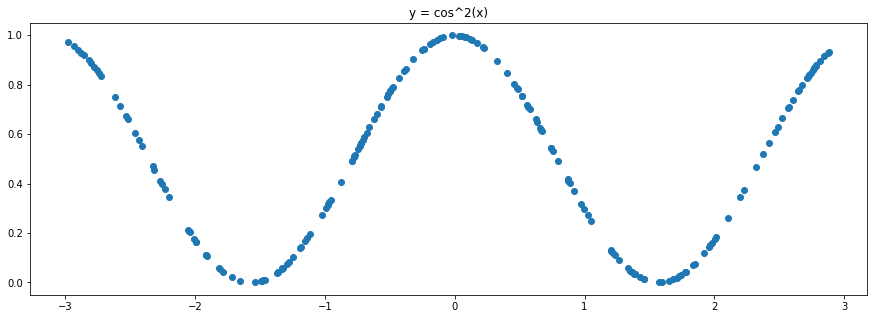

In [62]:
# создаем y train - второй набор данных
y_train = torch.cos(x_train)**2

# вывод на экран графика созданного примера
plt.plot(x_train, y_train, 'o') # 
plt.title('y = cos^2(x)')


Text(0.5, 1.0, 'случайный шум')

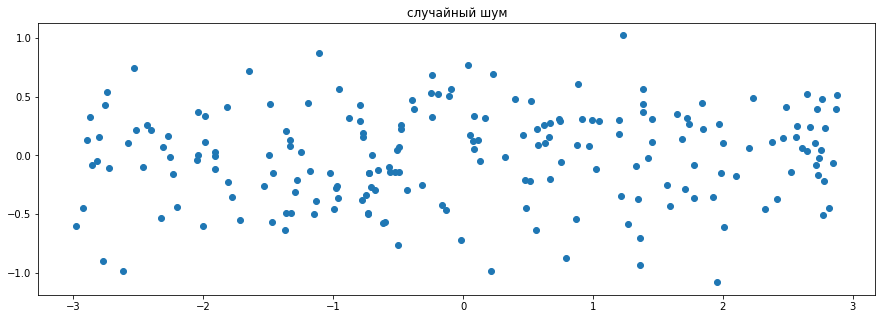

In [63]:
# создаем случайный шум
noize = torch.randn(y_train.shape) / 2.5

plt.plot(x_train, noize, 'o') # 
plt.title('случайный шум')


Text(0.5, 1.0, 'noize + y_train')

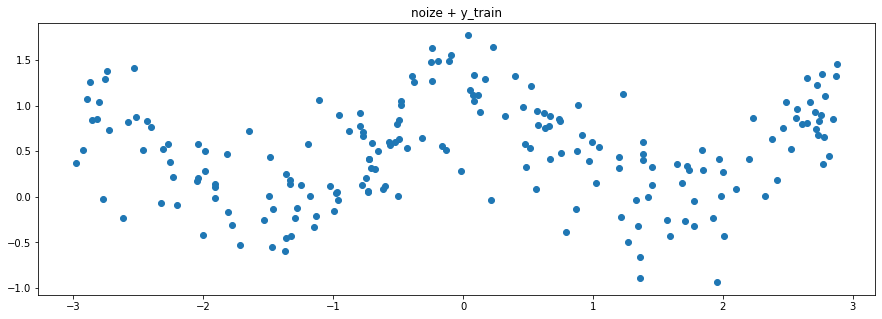

In [64]:
y_train2 = noize + y_train

plt.plot(x_train, y_train2, 'o') # 
plt.title('noize + y_train')

In [65]:
x_train.unsqueeze_(1)
y_train2.unsqueeze_(1) ; # ; - что бы не выводил на экран результат 

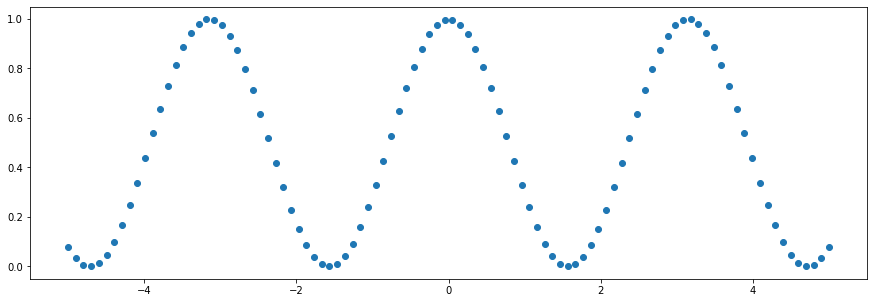

In [66]:
x_val = torch.linspace(-5, 5, 100)
y_val = torch.cos(x_val.data)**2

plt.plot(x_val, y_val, 'o')

In [67]:
x_val.unsqueeze_(1)
y_val.unsqueeze_(1) ;

In [68]:
class OurNet(torch.nn.Module):
  def __init__(self, n_hod_n):
    super(OurNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hod_n)
    self.act1= torch.nn.Sigmoid()
    self.fc4 = torch.nn.Linear(n_hod_n, 1)
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc4(x)
    return x
    
# первоначально сетка была более сложная (ниже воссоздам)

In [69]:
import numpy # для перевода из тензора в массив 

# создам функцию для вывода на экран результатов работы
def pred(net, x,y):
  y_pred = net.forward(x)

  plt.plot(x.numpy(), y.numpy(), 'o', c='b', label='Образец (эталон)')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'x', c='g', label='Результат сетки')
  plt.legend(loc='upper left')

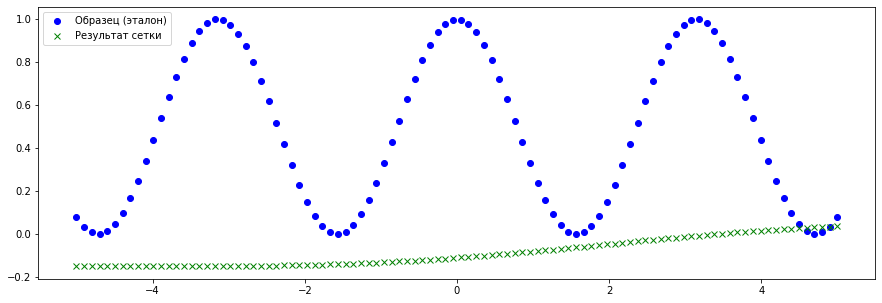

In [70]:
# создам сетку со 100 нейронами (в скобках)
ourNet = OurNet(100) 


pred(ourNet, x_val, y_val)

In [71]:
# сделаю функцию MSE (подсчет среднеквадратичной ошибки)

def los(pred, true):
  sq = (pred-true)**2
  return sq.mean()

In [72]:
# добавлю оптимайзер для уменьшения коэф. обучения
optimizer = torch.optim.Adam(ourNet.parameters(), lr=0.001)

for e in range(10000):   # создам цикл для повторения итераций обучения
  optimizer.zero_grad()  # обнуление градиента (что бы каждый раз начинался с нулей)

  y_pred = ourNet.forward(x_train)
  loss_val = los(y_pred, y_train2)
  loss_val.backward()
  optimizer.step()

# код говорит о том что нужно выводить на экран каждую 1000-ую эпоху
  if not e % 1000:    
    print (loss_val)


tensor(0.6405, grad_fn=<MeanBackward0>)
tensor(0.2272, grad_fn=<MeanBackward0>)
tensor(0.1524, grad_fn=<MeanBackward0>)
tensor(0.1502, grad_fn=<MeanBackward0>)
tensor(0.1495, grad_fn=<MeanBackward0>)
tensor(0.1487, grad_fn=<MeanBackward0>)
tensor(0.1476, grad_fn=<MeanBackward0>)
tensor(0.1466, grad_fn=<MeanBackward0>)
tensor(0.1459, grad_fn=<MeanBackward0>)
tensor(0.1453, grad_fn=<MeanBackward0>)


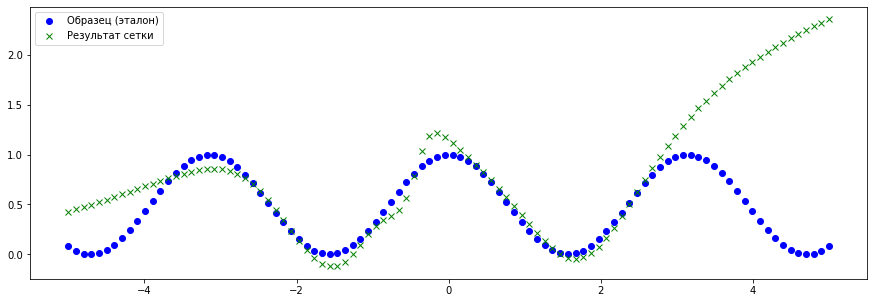

In [73]:
pred(ourNet, x_val, y_val)

In [74]:
ourNet = OurNet(300)  # увеличиваем в нейронке число нейронов до 300
optimizer = torch.optim.Adam(ourNet.parameters(), lr=0.001)


for e in range(10000):
  optimizer.zero_grad()

  y_pred = ourNet.forward(x_train)
  loss_val = los(y_pred, y_train2)
  if not e % 1000:
    print (loss_val)

  loss_val.backward()
  optimizer.step()

tensor(0.4178, grad_fn=<MeanBackward0>)
tensor(0.1524, grad_fn=<MeanBackward0>)
tensor(0.1501, grad_fn=<MeanBackward0>)
tensor(0.1497, grad_fn=<MeanBackward0>)
tensor(0.1492, grad_fn=<MeanBackward0>)
tensor(0.1487, grad_fn=<MeanBackward0>)
tensor(0.1483, grad_fn=<MeanBackward0>)
tensor(0.1479, grad_fn=<MeanBackward0>)
tensor(0.1476, grad_fn=<MeanBackward0>)
tensor(0.1470, grad_fn=<MeanBackward0>)


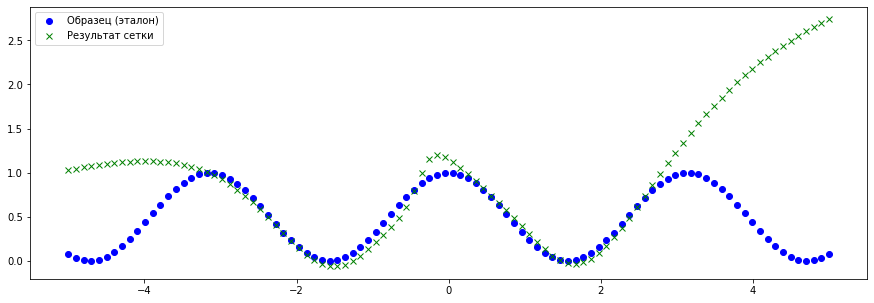

In [75]:
pred(ourNet, x_val, y_val)

tensor(0.7542, grad_fn=<MeanBackward0>)
tensor(0.1609, grad_fn=<MeanBackward0>)
tensor(0.1503, grad_fn=<MeanBackward0>)
tensor(0.1499, grad_fn=<MeanBackward0>)
tensor(0.1502, grad_fn=<MeanBackward0>)
tensor(0.1495, grad_fn=<MeanBackward0>)
tensor(0.1492, grad_fn=<MeanBackward0>)
tensor(0.1487, grad_fn=<MeanBackward0>)
tensor(0.1482, grad_fn=<MeanBackward0>)
tensor(0.1477, grad_fn=<MeanBackward0>)


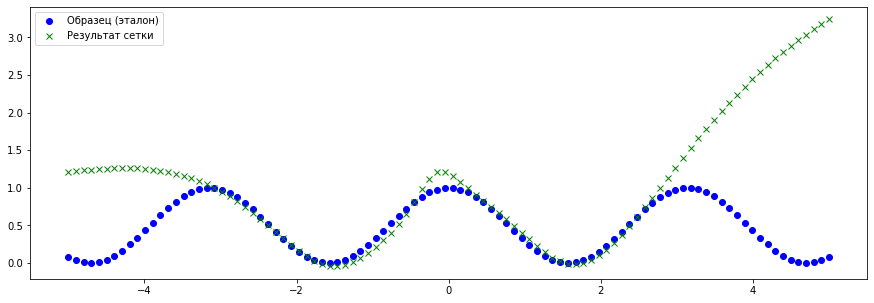

In [76]:
ourNet = OurNet(600) 
optimizer = torch.optim.Adam(ourNet.parameters(), lr=0.001)

for e in range(10000):
  optimizer.zero_grad()

  y_pred = ourNet.forward(x_train)
  loss_val = los(y_pred, y_train2)
  if not e % 1000:
    print (loss_val)

  loss_val.backward()
  optimizer.step()

pred(ourNet, x_val, y_val)

tensor(0.4599, grad_fn=<MeanBackward0>)
CPU times: user 621 µs, sys: 0 ns, total: 621 µs
Wall time: 632 µs
tensor(0.2922, grad_fn=<MeanBackward0>)
CPU times: user 457 µs, sys: 0 ns, total: 457 µs
Wall time: 466 µs
tensor(0.2801, grad_fn=<MeanBackward0>)
CPU times: user 502 µs, sys: 0 ns, total: 502 µs
Wall time: 511 µs
tensor(0.2465, grad_fn=<MeanBackward0>)
CPU times: user 479 µs, sys: 0 ns, total: 479 µs
Wall time: 487 µs
tensor(0.1910, grad_fn=<MeanBackward0>)
CPU times: user 464 µs, sys: 5 µs, total: 469 µs
Wall time: 478 µs
tensor(0.1569, grad_fn=<MeanBackward0>)
CPU times: user 463 µs, sys: 5 µs, total: 468 µs
Wall time: 478 µs
tensor(0.1517, grad_fn=<MeanBackward0>)
CPU times: user 479 µs, sys: 0 ns, total: 479 µs
Wall time: 487 µs
tensor(0.1510, grad_fn=<MeanBackward0>)
CPU times: user 457 µs, sys: 0 ns, total: 457 µs
Wall time: 465 µs
tensor(0.1505, grad_fn=<MeanBackward0>)
CPU times: user 459 µs, sys: 4 µs, total: 463 µs
Wall time: 473 µs
tensor(0.1502, grad_fn=<MeanBackward0

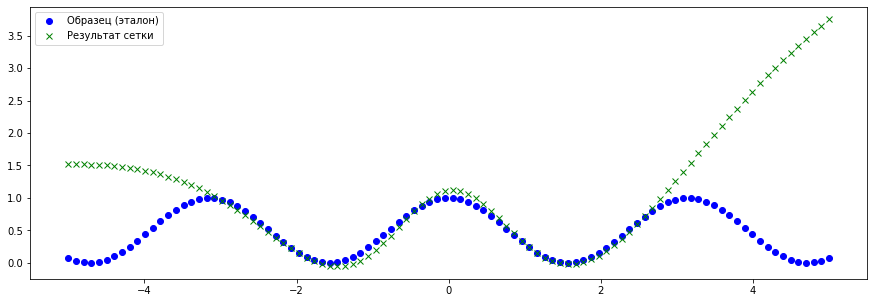

In [85]:
ourNet = OurNet(600) 
optimizer = torch.optim.Adam(ourNet.parameters(), lr=0.0001) # шаг обучения уменьшили в 10раз

for e in range(10000):
  optimizer.zero_grad()

  y_pred = ourNet.forward(x_train)
  loss_val = los(y_pred, y_train2)
  if not e % 1000:
    %time print (loss_val)

  loss_val.backward()
  optimizer.step()

pred(ourNet, x_val, y_val)

In [78]:
class OurNet2(torch.nn.Module):
  def __init__(self, n_hod_n):
    super(OurNet2, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hod_n)
    self.act1= torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hod_n, n_hod_n)
    self.act2= torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hod_n, n_hod_n)
    self.act3= torch.nn.Sigmoid()
    self.fc4 = torch.nn.Linear(n_hod_n, 1)
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    x = self.act3(x)
    x = self.fc4(x)
    return x
    

tensor(0.7692, grad_fn=<MeanBackward0>)
CPU times: user 1.67 ms, sys: 0 ns, total: 1.67 ms
Wall time: 3.45 ms
tensor(0.7692, grad_fn=<MeanBackward0>)
CPU times: user 432 µs, sys: 0 ns, total: 432 µs
Wall time: 440 µs
tensor(0.7692, grad_fn=<MeanBackward0>)
CPU times: user 454 µs, sys: 0 ns, total: 454 µs
Wall time: 464 µs
tensor(0.7692, grad_fn=<MeanBackward0>)
CPU times: user 435 µs, sys: 5 µs, total: 440 µs
Wall time: 448 µs
tensor(0.7692, grad_fn=<MeanBackward0>)
CPU times: user 457 µs, sys: 0 ns, total: 457 µs
Wall time: 466 µs


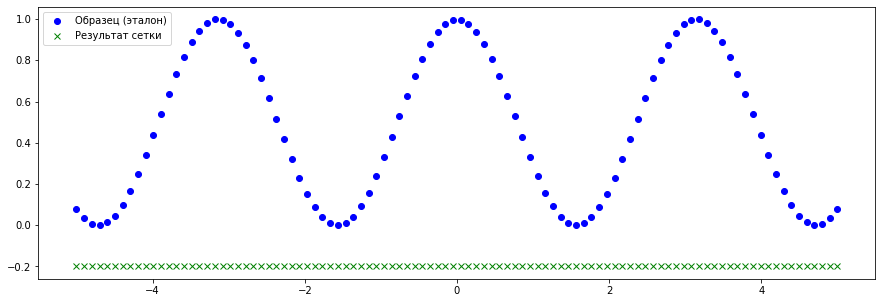

In [83]:
ourNet2 = OurNet2(25) 
optimizer = torch.optim.Adam(ourNet.parameters(), lr=0.001)

for e in range(5000):
  optimizer.zero_grad()

  y_pred = ourNet2.forward(x_train)
  loss_val = los(y_pred, y_train2)
  if not e % 1000:
    %time print (loss_val)

  loss_val.backward()
  optimizer.step()

pred(ourNet2, x_val, y_val)

In [ ]:
#   КАК ВИДИМ БОЛЕЕ СЛОЖНАЯ СТРУКТУРА НЕЙРОНКИ ПРОСТО ЗАУЧИВАЕТ ДАННЫЕ И НЕ ПРИВОДИТ К НУЖНОМУ РЕЗУЛЬТАТУ. 
#   ИМЕННО ПО ЭТОЦ ПРИЧИНЕ СТОИТ НАЧИНАТЬ С САМЫХ ПРОСТЫХ АРХИТЕКТУР NET
#   ДОБАВИВ ИЗМЕРЕНИЕ ВРЕМЕНИ, ЕЩЁ ОДИН ВЫВОД СЛОЖНАЯ СЕТЬ С 25 НЕЙРОНАМИ ПО ВРЕМЕНИ КАК ПРОСТАЯ С 600 НЕЙРОНАМИ
#   И К ТОМУЖЕ, ПЛЮСОМ, НЕ ДАЛА НИКАКОГО РЕЗУЛЬТАТ 